# Part 1: Convolutional Neural Network

###  Importing packages

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.models import Model
# import timeit

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Preparing Dataset

In [2]:
batch_size = 128
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("input shape",input_shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input shape (28, 28, 1)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building a Model

In [3]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

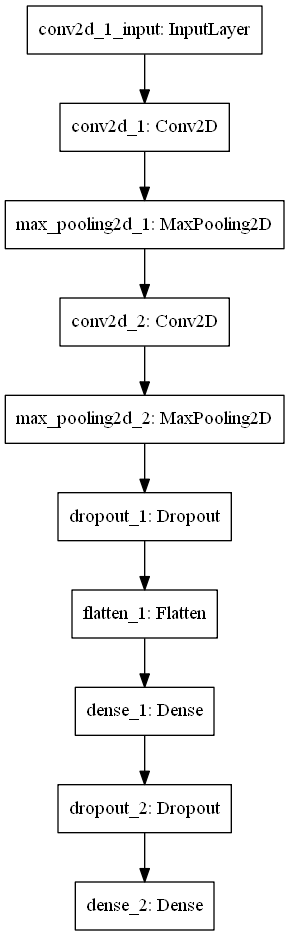

In [22]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

### Model Training

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 124us/step - loss: 0.2059 - accuracy: 0.9340 - val_loss: 0.0560 - val_accuracy: 0.9814
Epoch 2/4
60000/60000 [==============================] - 7s 119us/step - loss: 0.1964 - accuracy: 0.9388 - val_loss: 0.0499 - val_accuracy: 0.9831
Epoch 3/4
60000/60000 [==============================] - 7s 122us/step - loss: 0.1911 - accuracy: 0.9397 - val_loss: 0.0481 - val_accuracy: 0.9833
Epoch 4/4
60000/60000 [==============================] - 8s 125us/step - loss: 0.1869 - accuracy: 0.9412 - val_loss: 0.0466 - val_accuracy: 0.9840


### Testing

In [16]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 70us/step
Test loss: 0.04660662327706814
Test accuracy: 0.984000027179718


### Prediction

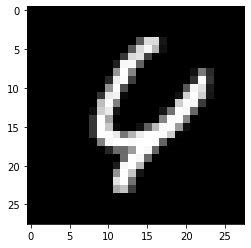

In [19]:
import pylab as plt

plt.imshow(x_test[121].reshape(28,28),cmap='gray')
plt.show()

In [20]:
import numpy as np
prediction = model.predict(x_test[121:122])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [1.0669159e-07 2.2138552e-07 3.1138875e-08 1.4153377e-12 9.9998879e-01
 9.5629824e-09 7.0079777e-06 4.5622961e-08 2.3853631e-06 1.4242718e-06]

Thresholded Score:
 [0 0 0 0 1 0 0 0 0 0]

Predicted Digit:
 4
